<a href="https://colab.research.google.com/github/SohagMollik/image-classification-dogs-v-cats-CNN/blob/main/cat_v_dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:10<00:00, 110MB/s]
100% 1.06G/1.06G [00:10<00:00, 104MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:

train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)

)


test_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:


def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label


train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [7]:

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
625/625 [==============================] - 81s 107ms/step - loss: 1.2676 - accuracy: 0.5738 - val_loss: 0.6346 - val_accuracy: 0.6422
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5882 - accuracy: 0.6859 - val_loss: 0.5523 - val_accuracy: 0.7108
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4911 - accuracy: 0.7666 - val_loss: 0.4882 - val_accuracy: 0.7650
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4245 - accuracy: 0.8055 - val_loss: 0.4766 - val_accuracy: 0.7740
Epoch 5/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3716 - accuracy: 0.8374 - val_loss: 0.4783 - val_accuracy: 0.7742
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2870 - accuracy: 0.8805 - val_loss: 0.6655 - val_accuracy: 0.7492
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.1996 - accuracy: 0.9225 - val_loss: 0.5559 - val_ac

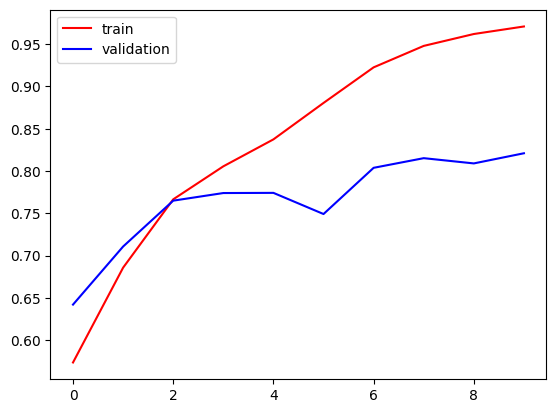

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

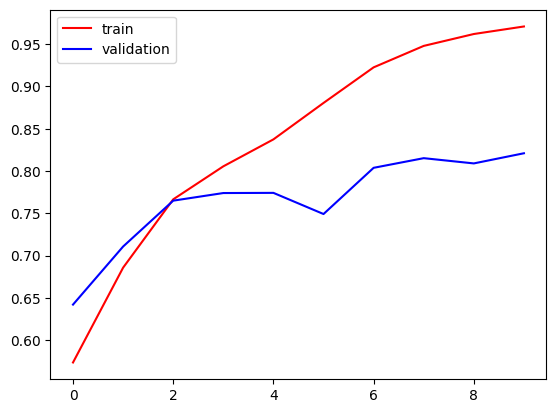

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

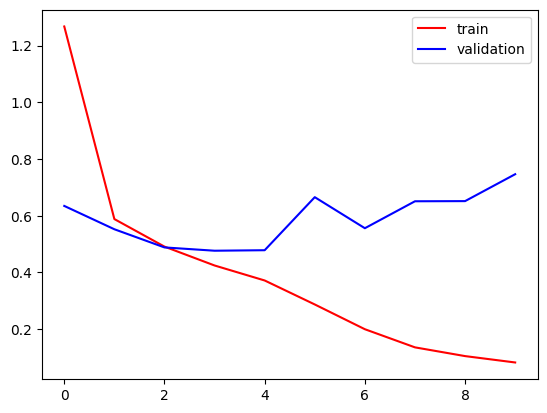

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

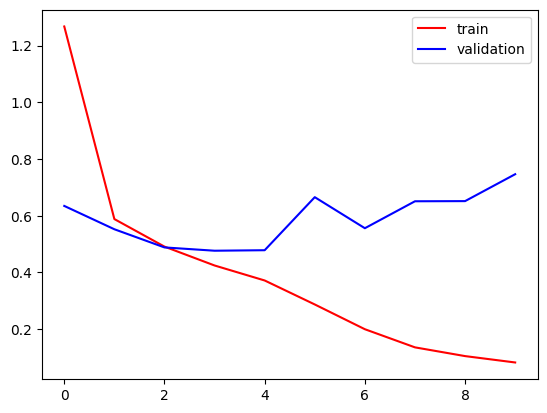

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/dog.png')

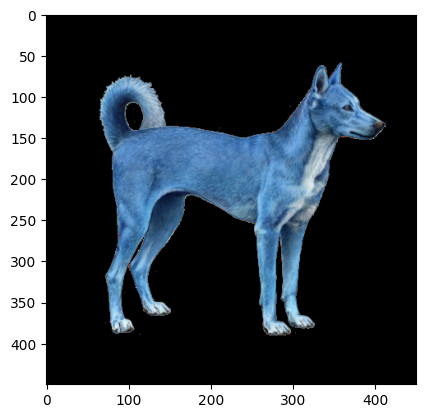

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(450, 450, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
threshold = 0.5

In [ ]:
prediction = model.predict(test_input)

1/1 [==============================] - 0s 280ms/step


In [ ]:
if prediction >= threshold:
    class_label = "dog"
else:
    class_label = "cat"


print(f"The image is classified as a {class_label}")


The image is classified as a dog


In [ ]:
prediction

array([[1.]], dtype=float32)

In [ ]:
model.save('/content/my_model.keras')

In [ ]:
model = keras.models.load_model('/content/my_model.keras')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
test_image = cv2.imread('/content/cat.jpeg')

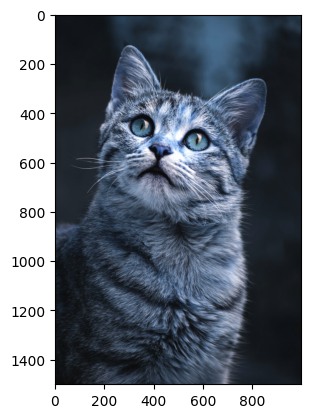

In [ ]:
plt.imshow(test_image)

In [ ]:
test_image = cv2.resize(test_image,(256,256))

In [ ]:
test_input = test_image.reshape((1,256,256,3))

In [ ]:
predictions = model.predict(test_input)

1/1 [==============================] - 0s 169ms/step


In [ ]:
if predictions>=0.5:
  print("Dog")
else:
  print("cat")

Dog


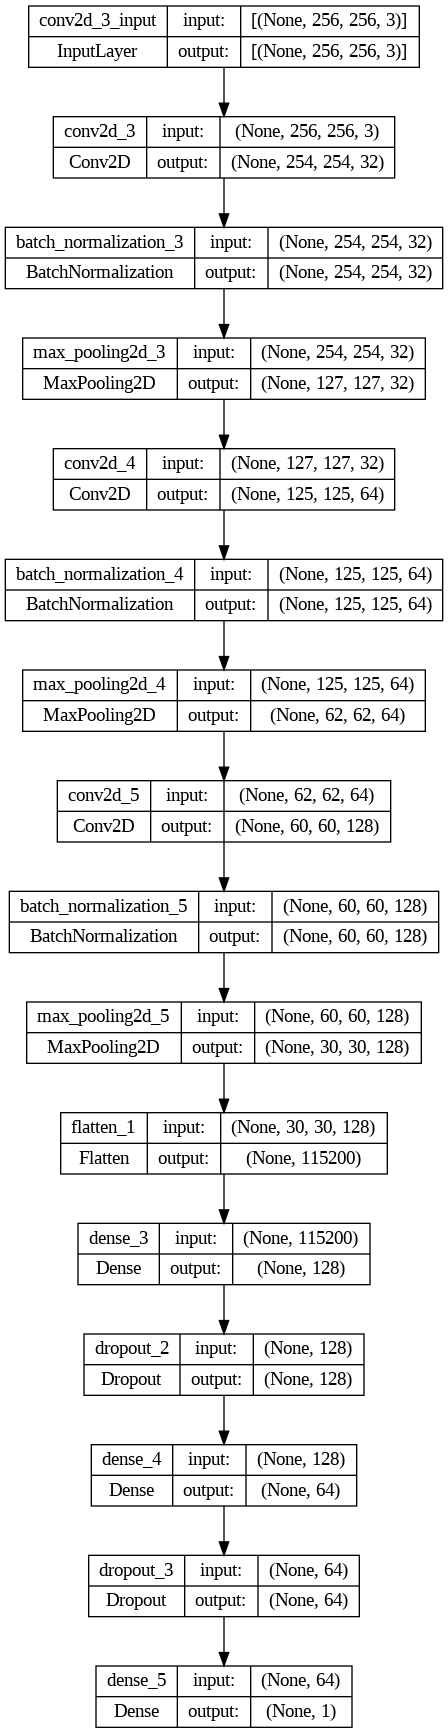

In [ ]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout

# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

# Compile the model (you should define an appropriate optimizer and loss function)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Generate a visualization of the model's architecture and save it to a file
plot_model(model, to_file='model.png', show_shapes=True)


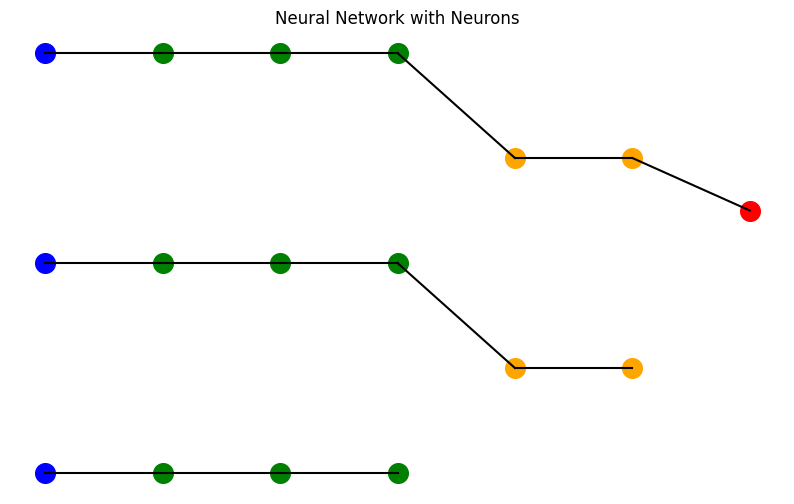

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Input layer
plt.scatter(1, 4, s=200, color='blue')  # Neuron 1
plt.scatter(1, 2, s=200, color='blue')  # Neuron 2
plt.scatter(1, 0, s=200, color='blue')  # Neuron 3
ax.annotate('Input Layer', (1, 5.5), fontsize=12, ha='center')

# Convolutional Layer 1
plt.scatter(3, 4, s=200, color='green')  # Neuron 1
plt.scatter(3, 2, s=200, color='green')  # Neuron 2
plt.scatter(3, 0, s=200, color='green')  # Neuron 3
ax.annotate('Conv Layer 1', (3, 5.5), fontsize=12, ha='center')

# Convolutional Layer 2
plt.scatter(5, 4, s=200, color='green')  # Neuron 1
plt.scatter(5, 2, s=200, color='green')  # Neuron 2
plt.scatter(5, 0, s=200, color='green')  # Neuron 3
ax.annotate('Conv Layer 2', (5, 5.5), fontsize=12, ha='center')

# Convolutional Layer 3
plt.scatter(7, 4, s=200, color='green')  # Neuron 1
plt.scatter(7, 2, s=200, color='green')  # Neuron 2
plt.scatter(7, 0, s=200, color='green')  # Neuron 3
ax.annotate('Conv Layer 3', (7, 5.5), fontsize=12, ha='center')

# Fully Connected Layer 1
plt.scatter(9, 3, s=200, color='orange')  # Neuron 1
plt.scatter(9, 1, s=200, color='orange')  # Neuron 2
ax.annotate('Fully Connected Layer 1', (9, 5.5), fontsize=12, ha='center')

# Fully Connected Layer 2
plt.scatter(11, 3, s=200, color='orange')  # Neuron 1
plt.scatter(11, 1, s=200, color='orange')  # Neuron 2
ax.annotate('Fully Connected Layer 2', (11, 5.5), fontsize=12, ha='center')

# Output Layer
plt.scatter(13, 2.5, s=200, color='red')  # Neuron 1
ax.annotate('Output Layer', (13, 5.5), fontsize=12, ha='center')

# Connect neurons with lines (adjust coordinates as needed)
plt.plot([1, 3], [4, 4], color='black')
plt.plot([1, 3], [2, 2], color='black')
plt.plot([1, 3], [0, 0], color='black')
plt.plot([3, 5], [4, 4], color='black')
plt.plot([3, 5], [2, 2], color='black')
plt.plot([3, 5], [0, 0], color='black')
plt.plot([5, 7], [4, 4], color='black')
plt.plot([5, 7], [2, 2], color='black')
plt.plot([5, 7], [0, 0], color='black')
plt.plot([7, 9], [4, 3], color='black')
plt.plot([7, 9], [2, 1], color='black')
plt.plot([9, 11], [3, 3], color='black')
plt.plot([9, 11], [1, 1], color='black')
plt.plot([11, 13], [3, 2.5], color='black')

# Set axis properties and display the diagram
ax.axis('off')
plt.title('Neural Network with Neurons')
plt.show()
